In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from tqdm import tqdm
from tensorflow.keras.utils import plot_model

%matplotlib inline

## Simulation 1: 1-dim no interaction

In [2]:
def sim_data_1(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, ))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X * 5

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i] + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_1(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X * 5
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i]
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i]
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i]
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i]

    return np.mean(Y)

In [5]:
embed_list = np.zeros((100, 4))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_1(1000, seed)
    mcitr = MCITR(layer_enc=1, layer_dec=1, layer_cov=0, act_enc="linear", act_dec="linear", act_cov="linear")
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300)

    embed_list[seed, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))



100%|██████████| 100/100 [07:34<00:00,  4.55s/it]


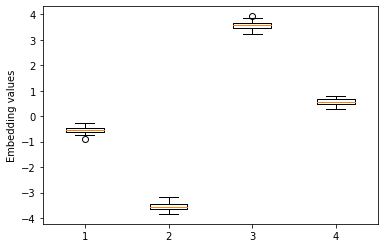

In [6]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")
plt.savefig("sim1_embed_values.jpg", dpi=300)

## Simulation 2: 1-dim interaction

In [2]:
def sim_data_2(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, ))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X * 5

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + 5 * X[i] + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_2(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X * 5
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i]
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + 4 * X[i]
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] - 3 * X[i]
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + 5 * X[i]

    return np.mean(Y)

In [3]:
embed_list = np.zeros((100, 4))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_2(1000, seed)
    mcitr = MCITR(optimizer="adam")
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y-3-5*X)

    embed_list[seed, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [08:57<00:00,  5.37s/it]


Text(0, 0.5, 'Embedding values')

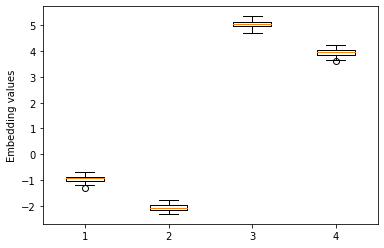

In [4]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")

In [5]:
embed_list = np.zeros((100, 4))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_2(1000, seed)
    mcitr = MCITR(optimizer="adam", bias_enc=False, bias_dec=False, bias_cov=False)
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300)

    embed_list[seed, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [07:48<00:00,  4.69s/it]


Text(0, 0.5, 'Embedding values')

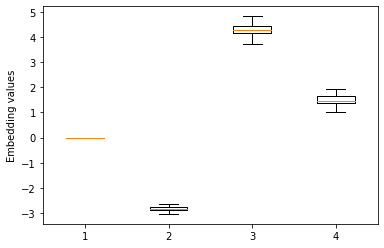

In [6]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")

### Conclusion: Under the interaction effects setting, the matrix factorization cannot estimate the treatment effects of (1, 1) well

In [7]:
embed_list = np.zeros((100, 4))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_2(1000, seed)
    mcitr = MCITR(layer_enc=2, layer_dec=2, layer_cov=0, width_enc=50, width_dec=50, act_enc="relu", act_dec="relu", optimizer="adam")
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y-3-5*X)

    embed_list[seed, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [09:15<00:00,  5.55s/it]


Text(0, 0.5, 'Embedding values')

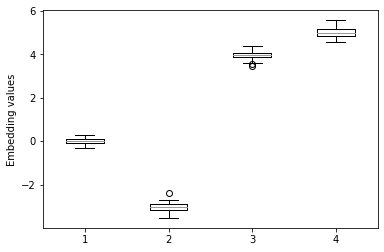

In [8]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")

### conclusion: given the true residual, autoencoder framework can estimate the treatment effects well, even without specifying the bias to be 0

In [9]:
embed_list = np.zeros((100, 4))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_2(1000, seed)
    mcitr = MCITR(layer_enc=2, layer_dec=2, layer_cov=0, width_enc=50, width_dec=50, act_enc="relu", act_dec="relu", 
                  bias_enc=False, bias_dec=False, bias_cov=False, optimizer="adam")
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300)

    embed_list[seed, 0] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [08:52<00:00,  5.32s/it]


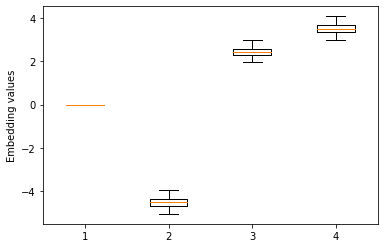

In [10]:
plt.boxplot(embed_list)
plt.ylabel("Embedding values")
plt.savefig("sim2_embed_values_2.jpg", dpi=300)

### conclusion: without the true residuals, the estimation of treatment effects are biased, even specifying the bias to be 0

## Simulation 3: 3-dim no interaction

In [2]:
def sim_data_3(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, 3))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 0, 1])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -3, 2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([2, -3, 3])) + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_3(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i]
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 0, 1]))
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -3, 2]))
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([2, -3, 3]))

    return np.mean(Y)

In [8]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_3(1000, seed)
    mcitr = MCITR(layer_enc=1, layer_dec=3, layer_cov=0, width_dec=20, bias_enc=False, bias_cov=False) # no bias in the encoder
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y - 3 - X[:, 0] - 2 * X[:, 1] + X[:, 2]) # given the true residual

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))


100%|██████████| 100/100 [08:41<00:00,  5.22s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x204ff5a42e0>,
 'caps': [<matplotlib.lines.Line2D at 0x204ff161dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204ff5a46d0>,
 'medians': [<matplotlib.lines.Line2D at 0x204ff161400>,
 'fliers': [<matplotlib.lines.Line2D at 0x204ff161d30>,
 'means': []}

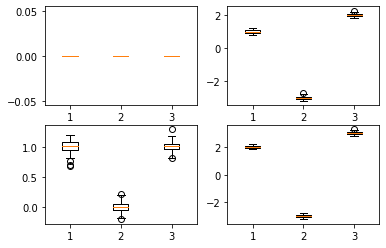

In [9]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])

### conclusion: without interaction effects, matrix factorization can estimate treatment effects accurately

## Simulation 4: 3-dim, interaction

In [10]:
def sim_data_4(sample_size, seed):

    np.random.seed(seed)

    X = np.random.uniform(low=-1, high=1, size=(sample_size, 3))
    A = np.random.choice([0, 1], size=(sample_size, 2))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]

    for i in range(sample_size):
        if (A[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -1/2, 2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([3/2, -1, 1/2])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-1/2, 1, -1])) + np.random.normal(size=(1, ))
        elif (A[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 2, 3])) + np.random.normal(size=(1, ))

    return Y, X, A

def pred_val_4(X, D):

    n = X.shape[0]
    Y = np.zeros((n, ))
    Y = 3 + X[:, 0] + 2 * X[:, 1] - X[:, 2]
    for i in range(n):
        if (D[i, :] == np.array([0, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, -1/2, 2]))
        elif (D[i, :] == np.array([1, 0])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([3/2, -1, 1/2]))
        elif (D[i, :] == np.array([0, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([-1/2, 1, -1]))
        elif (D[i, :] == np.array([1, 1])).all():
            Y[i] = Y[i] + X[i, :].dot(np.array([1, 2, 3]))

    return np.mean(Y)

In [13]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_4(1000, seed)
    mcitr = MCITR(layer_enc=1, layer_dec=3, layer_cov=0, width_dec=20, bias_enc=True) # no bias in the encoder
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y - 3 - X[:, 0] - 2 * X[:, 1] + X[:, 2]) # given the true residual

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))

100%|██████████| 100/100 [08:56<00:00,  5.36s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x204ff10b4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x204ff10baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204ff10b160>,
 'medians': [<matplotlib.lines.Line2D at 0x204ff0fd670>,
 'fliers': [<matplotlib.lines.Line2D at 0x204ff0fdc10>,
 'means': []}

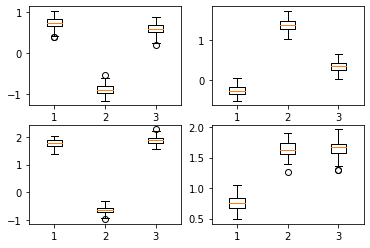

In [14]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])

### conclusion: given the interaction effects, matrix factorization cannot estimate the treatment effects accurately

In [17]:
embed_list = np.zeros((100, 4, 3))

for seed in tqdm(range(100)):
    Y, X, A = sim_data_4(1000, seed)
    mcitr = MCITR(layer_enc=2, layer_dec=3, layer_cov=0, width_enc=20, width_dec=20, act_enc="relu", act_dec="relu", bias_enc=True) # no bias in the encoder
    mcitr.fit(Y, X, A, learning_rate=1e-2, epochs=300, R=Y - 3 - X[:, 0] - 2 * X[:, 1] + X[:, 2]) # given the true residual

    embed_list[seed, 0, :] = mcitr.trt_encoder.predict(np.array([[0, 0]]))
    embed_list[seed, 1, :] = mcitr.trt_encoder.predict(np.array([[0, 1]]))
    embed_list[seed, 2, :] = mcitr.trt_encoder.predict(np.array([[1, 0]]))
    embed_list[seed, 3, :] = mcitr.trt_encoder.predict(np.array([[1, 1]]))

100%|██████████| 100/100 [08:30<00:00,  5.11s/it]


{'whiskers': [<matplotlib.lines.Line2D at 0x204ff4465e0>,
 'caps': [<matplotlib.lines.Line2D at 0x204ff446d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x204ff446250>,
 'medians': [<matplotlib.lines.Line2D at 0x204ff46e4c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x204ff46e850>,
 'means': []}

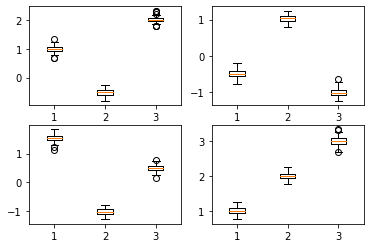

In [18]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].boxplot(embed_list[:, 0, :])
ax[0, 1].boxplot(embed_list[:, 1, :])
ax[1, 0].boxplot(embed_list[:, 2, :])
ax[1, 1].boxplot(embed_list[:, 3, :])

### conclusion: given the true residuals, the autoencoder can estimate the treatment effects accurately, even with the interaction effects